<a href="https://colab.research.google.com/github/rashakil-ds/Machine-Learning-with-Python/blob/master/The_Normal_or_Gaussian_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
files.upload()

Saving weight-height.csv to weight-height.csv


{'weight-height.csv': b'Gender,Height,Weight\r\nMale,73.84701702,241.8935632\r\nMale,68.78190405,162.3104725\r\nMale,74.11010539,212.7408556\r\nMale,71.7309784,220.0424703\r\nMale,69.88179586,206.3498006\r\nMale,67.25301569,152.2121558\r\nMale,68.78508125,183.9278886\r\nMale,68.34851551,167.9711105\r\nMale,67.01894966,175.9294404\r\nMale,63.45649398,156.3996764\r\nMale,71.19538228,186.6049256\r\nMale,71.64080512,213.7411695\r\nMale,64.76632913,167.1274611\r\nMale,69.2830701,189.4461814\r\nMale,69.24373223,186.434168\r\nMale,67.6456197,172.1869301\r\nMale,72.41831663,196.0285063\r\nMale,63.97432572,172.8834702\r\nMale,69.6400599,185.9839576\r\nMale,67.93600485,182.426648\r\nMale,67.91505019,174.1159291\r\nMale,69.43943987,197.7314216\r\nMale,66.14913196,149.173566\r\nMale,75.20597361,228.7617806\r\nMale,67.89319634,162.0066518\r\nMale,68.1440328,192.3439766\r\nMale,69.08963143,184.4351744\r\nMale,72.80084352,206.8281894\r\nMale,67.42124228,175.2139224\r\nMale,68.49641536,154.3426389\r\n

In [4]:
df = pd.read_csv('weight-height.csv')

In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [8]:
df.shape

(8555, 3)

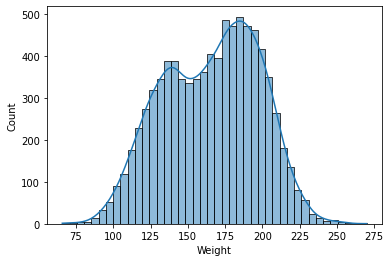

In [9]:
sns.histplot(df['Weight'], kde=True)

In [10]:
mean_value = df['Weight'].mean()  #calculate mean value
mean_value 

165.63273532667586

In [11]:
std_value = df['Weight'].std() #Calculate Standard Deviation
std_value

32.043922217215496

In [12]:
std_plus_3 = mean_value + (3 * std_value ) #you can use 2.5 std to more clean

In [13]:
std_plus_3

261.76450197832236

In [14]:
neg_std_3 = mean_value - (3 * std_value )  #you can use 2.5 std to more clean
neg_std_3

69.50096867502937

In [15]:
df[df['Weight'] > std_plus_3]   #Outlier

,Gender,Height,Weight
2014,Male,78.998742,269.989698


In [16]:
df[df['Weight'] < neg_std_3]  #Outlier

,Gender,Height,Weight
151,Male,65.350411,65.78000
160,Male,64.333648,68.64000
5360,Female,55.668202,68.98253


In [18]:
merge_outliers = df[(df['Weight'] > std_plus_3) | (df['Weight'] < neg_std_3)]   # Merge two type of outliers

In [19]:
merge_outliers

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
2014,Male,78.998742,269.989698
5360,Female,55.668202,68.982530


In [20]:
merge_outliers.shape

(4, 3)

In [21]:
remove_out_columns = df[(df['Weight'] < std_plus_3) & (df['Weight'] > neg_std_3)]  #drop all outliers

In [22]:
remove_out_columns

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [23]:
remove_out_columns.shape

(8551, 3)

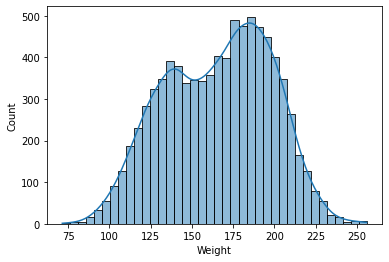

In [24]:
sns.histplot(remove_out_columns['Weight'], kde=True)

In [25]:
#One Hot Encoding
dummy_variables = pd.get_dummies(remove_out_columns['Gender'], drop_first=True)  #true means it will drop one dummy variable

In [26]:
dummy_variables

,Male
0,1
1,1
2,1
3,1
4,1
...,...
8550,0
8551,0
8552,0
8553,0


In [27]:
new_df = remove_out_columns.drop('Gender',axis=1)

In [29]:
new_df


,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [30]:
df = pd.concat([new_df,dummy_variables], axis=1) #Concat two data frame

In [31]:
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [32]:
df.tail()

,Height,Weight,Male
8550,60.483946,110.565497,0
8551,63.423372,129.921671,0
8552,65.584057,155.942671,0
8553,67.429971,151.678405,0
8554,60.921791,131.253738,0


In [33]:
x = df.drop('Height', axis=1)

In [34]:
y = df['Height']

In [35]:
x.head()

,Weight,Male
0,241.893563,1
1,162.310473,1
2,212.740856,1
3,220.042470,1
4,206.349801,1


In [36]:
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
#split dataset into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [39]:
xtrain.shape

(5985, 2)

In [40]:
xtest.shape

(2566, 2)

In [41]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [42]:
reg  = LinearRegression() #create linear reg object

In [43]:
reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
reg.coef_   # coefficient in linear regression

array([ 0.1234468 , -0.98660239])

In [45]:
reg.intercept_  # value of intercept

46.93128204123049

In [46]:
reg.predict(xtest)

array([65.72126577, 64.78641032, 67.79522705, ..., 69.00211426,
       68.04828346, 70.28684906])

In [48]:
reg.predict(xtest).shape

(2566,)

In [49]:
pred = reg.predict(xtest)

In [50]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
mean_squared_error(ytest, pred)

2.1145208634701906

In [52]:
r2_score(ytest,pred)

0.8578364407986426

In [ ]:
So, Our Model Accuracy is 85.78%
for more details visit: https://youtube.com/studymart
